# Exploring Campaign 1

Let's take a look at campaign 1 of Critical Role: Vox Machina! This was the inaugural campaign, picking up in the middle of a home game and coming to actual play for the first time. We might expect to see some major changes as the campaign goes along. Some things to look at:

- Do the different actors have different profiles in terms of how much they speak and how long their dialogue is?
- Do these change over time - do they become more or less active or verbose?

## Loading the Data

First, we need to load all the data we want to look at, which is all episodes of campaign 1. We have a database that includes information for each episode, as well as pre-processed transcripts for each episode.

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

def_max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', 200)

In [72]:
data_dir = '../../data'
db_file = f'{data_dir}/transcript_database.csv'

db = pd.read_csv(
    db_file,
    parse_dates = ['download_date']
)
drop_cols = ['section', 'section_no', 'link', 'download_date']
campaign1_db = db.loc[db['section_no'] == 1].drop(drop_cols, axis = 1)
campaign1_db

,subsection_no,episode_no,subsection,episode,transcript_file
0,1,1,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,section001/subsection001/episode001.csv
1,1,2,Arc 1: Kraghammer and Vasselheim,Into_the_Greyspine_Mines,section001/subsection001/episode002.csv
2,1,3,Arc 1: Kraghammer and Vasselheim,Strange_Bedfellows,section001/subsection001/episode003.csv
3,1,4,Arc 1: Kraghammer and Vasselheim,Attack_on_the_Duergar_Warcamp,section001/subsection001/episode004.csv
4,1,5,Arc 1: Kraghammer and Vasselheim,The_Trick_about_Falling,section001/subsection001/episode005.csv
5,1,6,Arc 1: Kraghammer and Vasselheim,Breaching_the_Emberhold,section001/subsection001/episode006.csv
6,1,7,Arc 1: Kraghammer and Vasselheim,The_Throne_Room,section001/subsection001/episode007.csv
7,1,8,Arc 1: Kraghammer and Vasselheim,Glass_and_Bone,section001/subsection001/episode008.csv
8,1,9,Arc 1: Kraghammer and Vasselheim,Yug%27Voril_Uncovered,section001/subsection001/episode009.csv
9,1,10,Arc 1: Kraghammer and Vasselheim,K%27Varn_Revealed,section001/subsection001/episode010.csv


There are 115 episodes in campaign 1, split into 5 arcs.

In [73]:
print(campaign1_db['subsection'].value_counts())

subsection
Arc 3: The Chroma Conclave          46
Arc 1: Kraghammer and Vasselheim    23
Arc 5: Vecna                        16
Arc 2: The Briarwoods               15
Arc 4: Taryon Darrington            15
Name: count, dtype: int64


Now, let's get all the transcripts into a single giant `DataFrame`.

In [74]:
def GetTranscript(arc_no, ep_no, transcript_file):
    df = pd.read_csv(f'{data_dir}/{transcript_file}')
    df.insert(0, 'arc_no', arc_no)
    df.insert(1, 'episode_no', ep_no)
    return df

transcripts = pd.DataFrame()
for index, row in campaign1_db.iterrows():
    transcripts = pd.concat([
        transcripts,
        GetTranscript(row['subsection_no'], row['episode_no'], row['transcript_file'])        
    ])
transcripts.reset_index(inplace = True)
transcripts.drop('index', axis = 1, inplace = True)
transcripts

,arc_no,episode_no,section_no,line_no,section,speaker,line
0,1,1,1,1,Pre-Show,MATT,"Hello everyone. My name is Matthew Mercer, voi..."
1,1,1,1,2,Pre-Show,TRAVIS,"Right, listen up! If you have ale, then you ha..."
2,1,1,1,3,Pre-Show,TRAVIS,[record scratch] Wait.\n
3,1,1,1,4,Pre-Show,TRAVIS (CONT'D),"Easily the brains of the group, Grog is often ..."
4,1,1,1,5,Pre-Show,MARISHA,A first impression of Keyleth would leave you ...
...,...,...,...,...,...,...,...
291615,5,16,4,1236,Part II,MARISHA,That was beautiful.
291616,5,16,4,1237,Part II,SAM,"Thanks, Matt. That was really nice."
291617,5,16,4,1238,Part II,MATT,"Love you, guys."
291618,5,16,4,1239,Part II,LAURA,"Love you, Matthew."


We have nearly 300,000 rows, so a good dataset to work with.

In [75]:
pd.crosstab(
    transcripts['arc_no'].astype(str) + '-' + transcripts['episode_no'].apply('{:02d}'.format),
    transcripts['section']
)

section,Announcements and Break,Break,Gameplay,Part I,Part II,Post-Game,Post-Game and Q&A,Post-Show,Pre-Show,Q & A,Q & A Session,The Story of Vox Machina
row_0,,,,,,,,,,,,
1-01,0,11,0,1049,1080,0,0,0,55,0,0,0
1-02,0,9,0,1325,1601,0,0,0,14,0,0,0
1-03,0,2,0,1513,1431,0,0,0,0,0,0,0
1-04,191,0,0,2263,0,0,0,0,43,0,1087,0
1-05,0,18,0,1553,2003,0,0,0,21,0,0,0
1-06,0,15,0,1543,1120,0,0,0,30,0,0,0
1-07,0,1,0,1192,1352,0,0,0,22,0,0,0
1-08,0,0,0,1942,0,0,0,140,7,0,0,0
1-09,0,1,0,918,945,0,0,0,71,0,0,0


Looking at this breakdown, it seems that the episodes generally have a lot of data in 'Part I' and 'Part II'. Some episodes only have a 'Part I', and there are some with various other sections, particularly early in the campaign. These tend to be Q&As with various names. Also note episode 1-12, which, if we look above is 'Dungeons & Dragons Campaign Tips', so no actual play in the campaign. So let's remove that episode and only look at dialogue in 'Part I' and 'Part II' from each episode.

In [76]:
filtered_transcripts = transcripts.query('~(arc_no == 1 & episode_no == 12) & (section == "Part I" | section == "Part II")')
filtered_transcripts.reset_index(inplace = True)

In [77]:
pd.crosstab(
    filtered_transcripts['arc_no'].astype(str) + '-' + filtered_transcripts['episode_no'].apply('{:02d}'.format),
    filtered_transcripts['section']
)

section,Part I,Part II
row_0,,
1-01,1049,1080
1-02,1325,1601
1-03,1513,1431
1-04,2263,0
1-05,1553,2003
1-06,1543,1120
1-07,1192,1352
1-08,1942,0
1-09,918,945


In [82]:
speaker_counts = filtered_transcripts['speaker'].value_counts()
print(speaker_counts[speaker_counts > 10])

speaker
MATT                    77892
LAURA                   40203
SAM                     29845
MARISHA                 29699
TRAVIS                  27194
TALIESIN                26151
LIAM                    24868
ASHLEY                   7638
ORION                    4802
MARY                     1235
WILL                     1183
PATRICK                   757
JON                       547
FELICIA                   535
CHRIS                     492
JOE                       461
WIL                       384
ALL                       356
ZAC                       343
NOELLE                    318
DARIN                     273
JASON                      88
KIT                        81
LAURA and MARISHA          81
TALIESIN and MARISHA       69
LAURA and LIAM             53
MARISHA and TALIESIN       45
TRAVIS and LAURA           41
LIAM and LAURA             37
SAM and TALIESIN           34
LAURA and TRAVIS           34
LAURA and SAM              31
LAURA and TALIESIN         31
LA

Here we can see that the main cast definitely have the most lines, with at least 4500 each. Ashley and Orion have fewer than the rest - Ashley because she was absent filming a TV show, and Orion because he left partway through the season. Guest stars had varying numbers of lines, but let's look just at the main cast.

In [90]:
main_cast = speaker_counts[speaker_counts > 4500].index.to_list()
main_cast_transcripts = filtered_transcripts[filtered_transcripts['speaker'].isin(main_cast)]
main_cast_transcripts.reset_index(inplace = True)
main_cast_transcripts

,level_0,index,arc_no,episode_no,section_no,line_no,section,speaker,line
0,0,55,1,1,2,1,Part I,MATT,All right! Let's jump on in. Thank you. Last w...
1,1,56,1,1,2,2,Part I,TRAVIS,Son of a bitch.
2,2,57,1,1,2,3,Part I,MATT,"Yep, the barbarian for his first and only time..."
3,3,58,1,1,2,4,Part I,TRAVIS,Next time he dies.
4,4,59,1,1,2,5,Part I,MATT,Yeah. Essentially. Which managed to not turn i...
...,...,...,...,...,...,...,...,...,...
268287,276690,291615,5,16,4,1236,Part II,MARISHA,That was beautiful.
268288,276691,291616,5,16,4,1237,Part II,SAM,"Thanks, Matt. That was really nice."
268289,276692,291617,5,16,4,1238,Part II,MATT,"Love you, guys."
268290,276693,291618,5,16,4,1239,Part II,LAURA,"Love you, Matthew."


In [95]:
main_cast_lines = main_cast_transcripts['speaker'].value_counts()
main_cast_lines

speaker
MATT        77892
LAURA       40203
SAM         29845
MARISHA     29699
TRAVIS      27194
TALIESIN    26151
LIAM        24868
ASHLEY       7638
ORION        4802
Name: count, dtype: int64

Let's define some colors for each cast member and their character (or DM):

In [116]:
vm_palette = {
    'MATT': '#9f6701', #brown
    'LAURA': '#209bc7', #cerulean blue
    'SAM': '#971287', #royal purple
    'MARISHA': '#228B22', #forest green
    'TRAVIS': '#bcbcbc', #grey
    'TALIESIN': '#2020a0', #navy blue
    'LIAM': '#333333', #charcoal
    'ASHLEY': '#ffd700', #gold
    'ORION': '#600300' #rust red
}

<Axes: ylabel='count'>

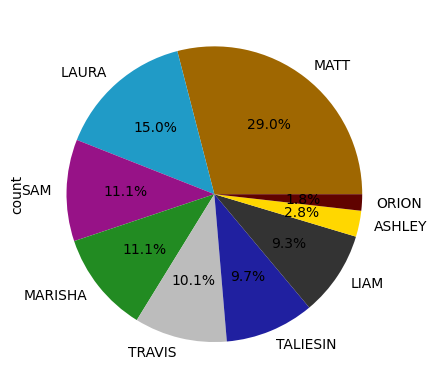

In [117]:
main_cast_lines.plot.pie(
    colors  = vm_palette.values(),
    autopct = '%1.1f%%'
)